In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [37]:
iris = load_iris()
X = iris.data
y = iris.target

In [38]:
y_binary = (y == 0).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

In [48]:
model = LogisticRegression()
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)[:, 1]

In [40]:
def precision_score(y_true, y_pred):
    tp = np.sum((y_pred == 1) & (y_true == 1))
    fp = np.sum((y_pred == 1) & (y_true == 0))
    return tp / (tp + fp) if (tp + fp) != 0 else 0

def recall_score(y_true, y_pred):
    tp = np.sum((y_pred == 1) & (y_true == 1))
    fn = np.sum((y_pred == 0) & (y_true == 1))
    return tp / (tp + fn) if (tp + fn) != 0 else 0

def f1_score(precision, recall):
    return 2 * precision * recall / (precision + recall) if (precision + recall) != 0 else 0


In [ ]:
thresholds = [0.3, 0.5, 0.7]
precisions = []
recalls = []
f1_scores = []

for threshold in thresholds:
    preds = (probs >= threshold).astype(int)
    prec = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1 = f1_score(prec, rec)
    
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

In [43]:
print("precisions:", precisions)
print("recalls:", recalls)
print("f1_scores:", f1_scores)

precisions: [np.float64(1.0), np.float64(1.0), np.float64(1.0)]
recalls: [np.float64(1.0), np.float64(1.0), np.float64(1.0)]
f1_scores: [np.float64(1.0), np.float64(1.0), np.float64(1.0)]


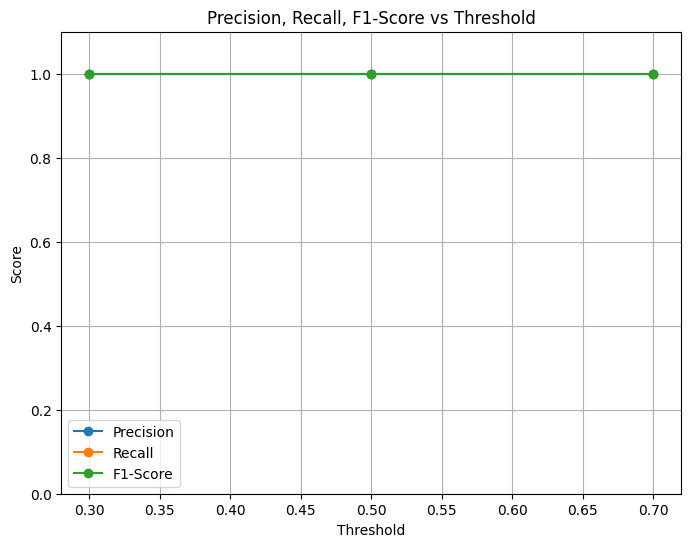

In [44]:
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions, label="Precision", marker='o')
plt.plot(thresholds, recalls, label="Recall", marker='o')
plt.plot(thresholds, f1_scores, label="F1-Score", marker='o')
plt.title("Precision, Recall, F1-Score vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True)
plt.show()

In [49]:
clf1 = RandomForestClassifier(random_state=42)
clf2 = SVC(kernel="linear", probability=True, random_state=42)

In [50]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

f1_scores_clf1 = []
f1_scores_clf2 = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf1.fit(X_train, y_train)
    preds1 = clf1.predict(X_test)
    f1_scores_clf1.append(f1_score(y_test, preds1, average="macro"))

    clf2.fit(X_train, y_train)
    preds2 = clf2.predict(X_test)
    f1_scores_clf2.append(f1_score(y_test, preds2, average="macro"))

In [51]:
f1_scores_clf1 = np.array(f1_scores_clf1)
f1_scores_clf2 = np.array(f1_scores_clf2)

diff = f1_scores_clf1 - f1_scores_clf2
mean_diff = np.mean(diff)
var_diff = np.sum((diff - mean_diff) ** 2) / 10

t_statistic = mean_diff / np.sqrt(var_diff / 10)

In [52]:
print(f"Random Forest F1-Scores (10 folds): {f1_scores_clf1}")
print(f"SVM F1-Scores (10 folds): {f1_scores_clf2}")
print(f"Paired t-test statistic: {t_statistic}")

Random Forest F1-Scores (10 folds): [1.         1.         1.         0.93265993 0.86666667 0.93265993
 1.         1.         0.93265993 0.86111111]
SVM F1-Scores (10 folds): [1.         1.         1.         1.         0.93265993 0.86111111
 1.         1.         1.         1.        ]
Paired t-test statistic: -1.5308629310536344
